/tmp/ipykernel_12209/3667615748.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_12209/3667615748.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_12209/3667615748.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_12209/3667615748.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_12209/3667615748.py:25: FutureWarning: The fr

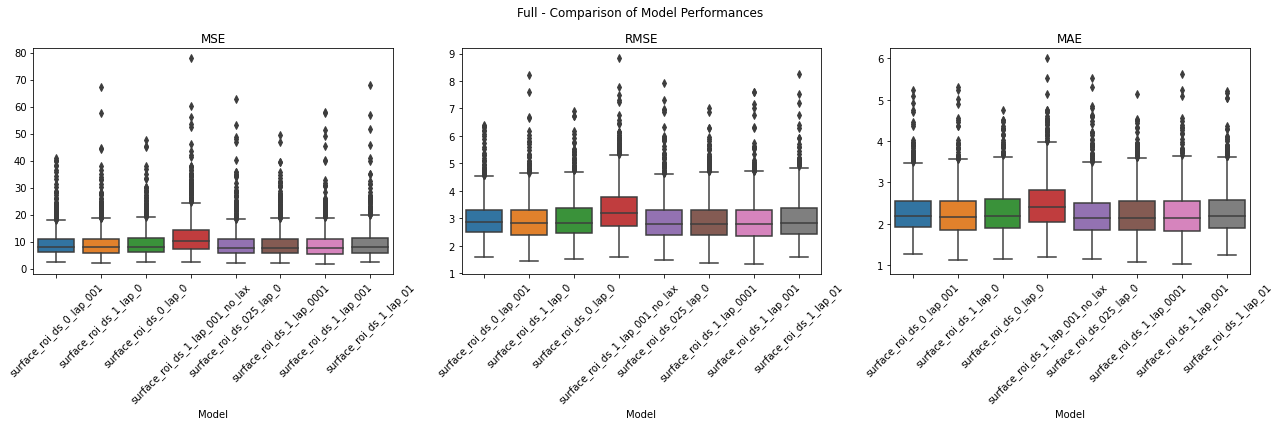

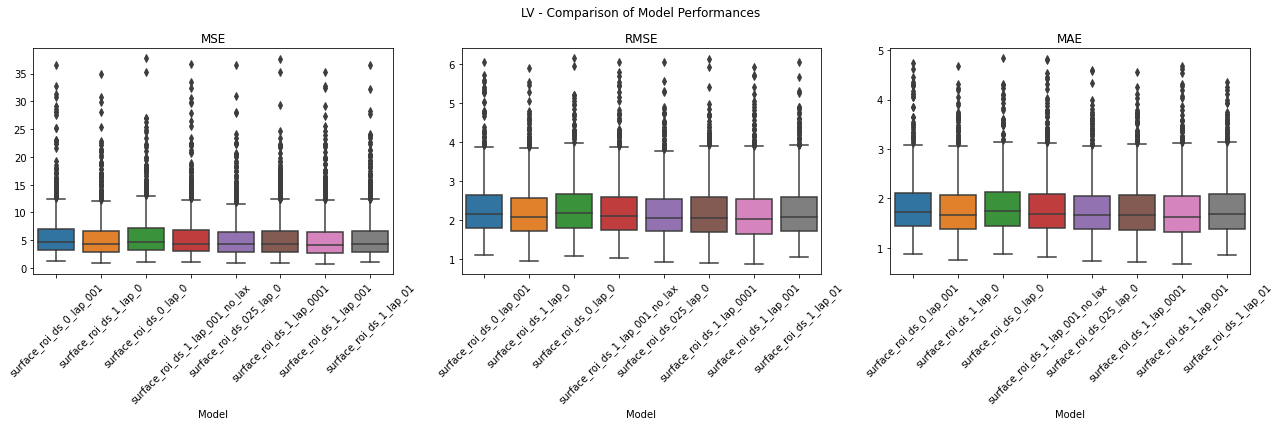

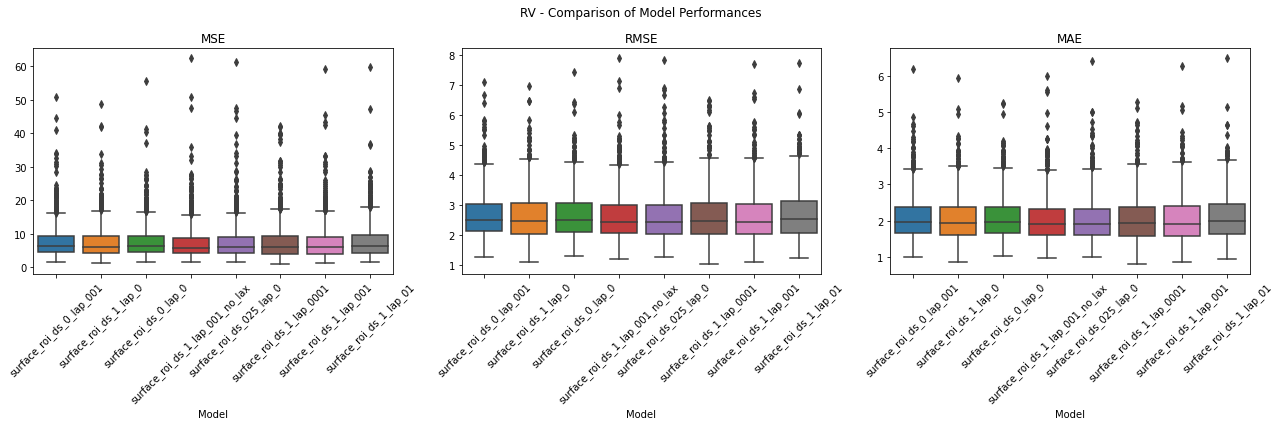

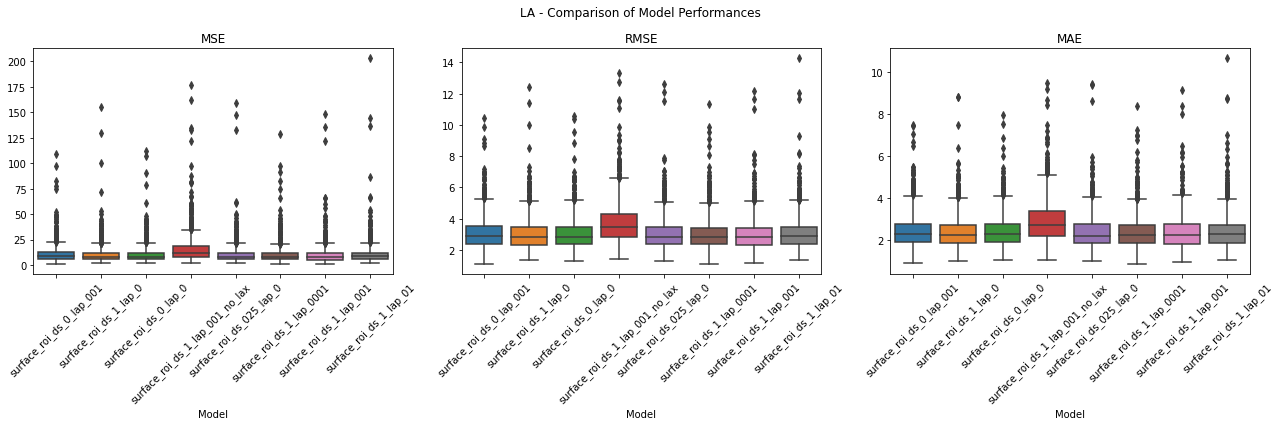

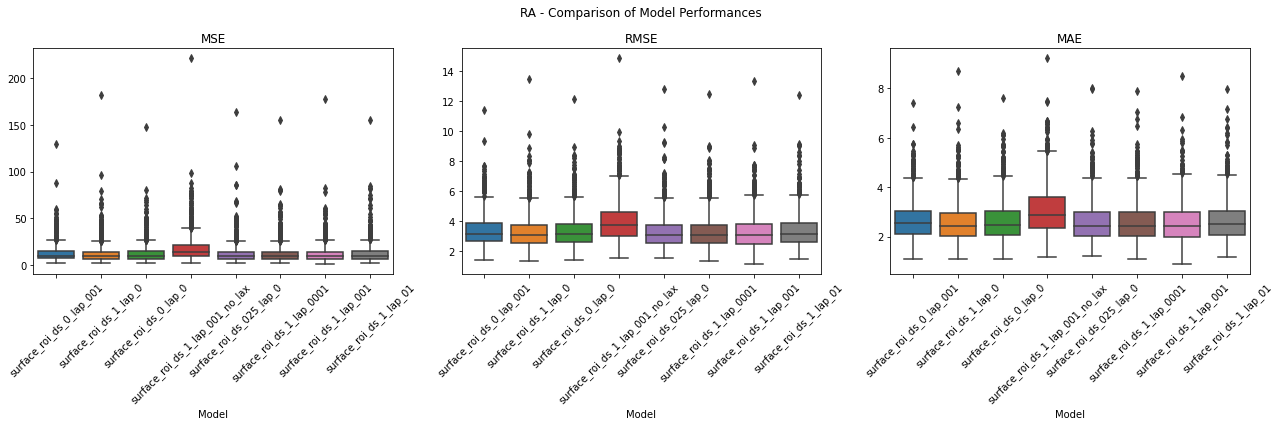

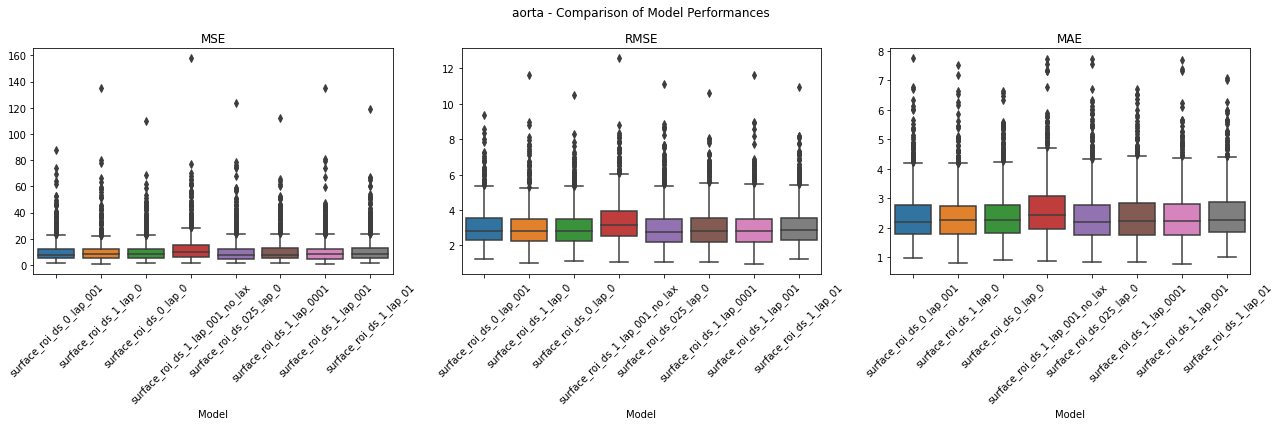

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and process the evaluation results from a CSV file
def process_results(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df['Model'] = model_name
    return df[['Model', 'Subpart', 'MSE', 'RMSE', 'MAE']]

# Directory containing the evaluation results
results_dir = "../Predictions/Surface/"

# DataFrame to store the evaluation results for each subpart
all_results = pd.DataFrame()

# Iterate over the models in the directory
for model_name in os.listdir(results_dir):
    model_path = os.path.join(results_dir, model_name)
    eval_file = os.path.join(model_path, "eval.csv")

    # Process the evaluation results for the current model
    results = process_results(eval_file, model_name)
    all_results = all_results.append(results, ignore_index=True)

# Create boxplots for MSE, RMSE, and MAE for each subpart
subparts = ['Full', 'LV', 'RV', 'LA', 'RA', 'aorta']
metrics = ['MSE', 'RMSE', 'MAE']

for subpart in subparts:
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))

    for i, metric in enumerate(metrics):
        subset = all_results[all_results['Subpart'] == subpart]
        sns.boxplot(x="Model", y=metric, data=subset, ax=axes[i])
        axes[i].set_title(metric)
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', rotation=45)

    plt.suptitle(f"{subpart} - Comparison of Model Performances")
    plt.tight_layout()
    plt.show()


In [5]:
def get_nice_dataframe_sub(df, metrics, subpart = "Full", vertical = False):
    models = df["Model"].unique()
    df = df.copy()
    df = df[df["Subpart"] == subpart]

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(2)
    df_std = df_std.round(2)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]) 
            std_str = str(df_std.loc[model, metric]) 
            if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
                mean_str += '0'
            if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
                std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df

metrics = ['MAE', 'MSE', 'RMSE']
subparts = ['Full', 'LV', 'RV', 'LA', 'RA', 'aorta']

for subpart in subparts:
    print(subpart)
    nice = get_nice_dataframe_sub(all_results, metrics, subpart, vertical=1)
    display(nice)


Full


,surface_roi_ds_0_lap_001,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_0001,surface_roi_ds_1_lap_001,surface_roi_ds_1_lap_01
MAE,2.29 (0.54),2.25 (0.56),2.29 (0.55),2.49 (0.62),2.25 (0.57),2.24 (0.57),2.23 (0.58),2.29 (0.57)
MSE,9.37 (5.12),9.14 (5.49),9.39 (5.26),11.80 (7.11),9.20 (5.69),9.17 (5.41),9.06 (5.58),9.54 (5.68)
RMSE,2.97 (0.73),2.92 (0.77),2.97 (0.75),3.32 (0.89),2.93 (0.78),2.93 (0.78),2.90 (0.79),2.99 (0.78)


LV


,surface_roi_ds_0_lap_001,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_0001,surface_roi_ds_1_lap_001,surface_roi_ds_1_lap_01
MAE,1.82 (0.56),1.78 (0.56),1.84 (0.56),1.81 (0.58),1.77 (0.56),1.77 (0.57),1.75 (0.60),1.79 (0.58)
MSE,5.68 (3.97),5.41 (3.80),5.78 (3.89),5.59 (4.08),5.39 (3.79),5.40 (3.90),5.34 (4.08),5.55 (4.01)
RMSE,2.28 (0.70),2.22 (0.70),2.30 (0.69),2.25 (0.72),2.22 (0.69),2.21 (0.72),2.18 (0.75),2.24 (0.73)


RV


,surface_roi_ds_0_lap_001,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_0001,surface_roi_ds_1_lap_001,surface_roi_ds_1_lap_01
MAE,2.07 (0.58),2.04 (0.60),2.08 (0.58),2.04 (0.60),2.03 (0.61),2.04 (0.63),2.03 (0.62),2.09 (0.62)
MSE,7.56 (4.81),7.39 (4.83),7.60 (4.83),7.38 (5.09),7.36 (5.21),7.49 (5.25),7.45 (5.20),7.77 (5.11)
RMSE,2.65 (0.75),2.61 (0.77),2.65 (0.76),2.60 (0.78),2.59 (0.79),2.61 (0.83),2.60 (0.81),2.67 (0.80)


LA


,surface_roi_ds_0_lap_001,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_0001,surface_roi_ds_1_lap_001,surface_roi_ds_1_lap_01
MAE,2.42 (0.78),2.37 (0.78),2.42 (0.77),2.90 (1.03),2.38 (0.78),2.38 (0.77),2.36 (0.80),2.41 (0.83)
MSE,10.40 (8.49),10.02 (9.16),10.30 (8.51),15.74 (14.32),10.06 (9.54),10.05 (8.69),9.93 (9.38),10.44 (10.62)
RMSE,3.06 (1.01),3.00 (1.02),3.05 (1.01),3.72 (1.38),3.01 (1.01),3.01 (1.01),2.97 (1.04),3.05 (1.07)


RA


,surface_roi_ds_0_lap_001,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_0001,surface_roi_ds_1_lap_001,surface_roi_ds_1_lap_01
MAE,2.64 (0.77),2.57 (0.82),2.62 (0.79),3.06 (0.99),2.59 (0.82),2.57 (0.82),2.55 (0.80),2.64 (0.83)
MSE,12.43 (8.95),12.03 (10.32),12.36 (9.62),17.57 (14.05),12.17 (10.27),12.00 (9.88),11.75 (9.74),12.61 (10.13)
RMSE,3.37 (1.04),3.29 (1.11),3.35 (1.08),3.97 (1.36),3.31 (1.12),3.28 (1.10),3.25 (1.09),3.37 (1.12)


aorta


,surface_roi_ds_0_lap_001,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_0001,surface_roi_ds_1_lap_001,surface_roi_ds_1_lap_01
MAE,2.38 (0.85),2.38 (0.86),2.40 (0.85),2.61 (0.92),2.39 (0.91),2.39 (0.88),2.36 (0.87),2.44 (0.87)
MSE,10.22 (8.31),10.23 (9.17),10.31 (8.47),12.76 (10.69),10.47 (9.63),10.35 (8.91),10.09 (9.06),10.75 (9.10)
RMSE,3.02 (1.06),3.00 (1.11),3.03 (1.07),3.36 (1.22),3.02 (1.16),3.01 (1.13),2.97 (1.11),3.08 (1.12)


/tmp/ipykernel_12209/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_12209/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_12209/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_12209/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_12209/3849485326.py:28: FutureWarning: The fr

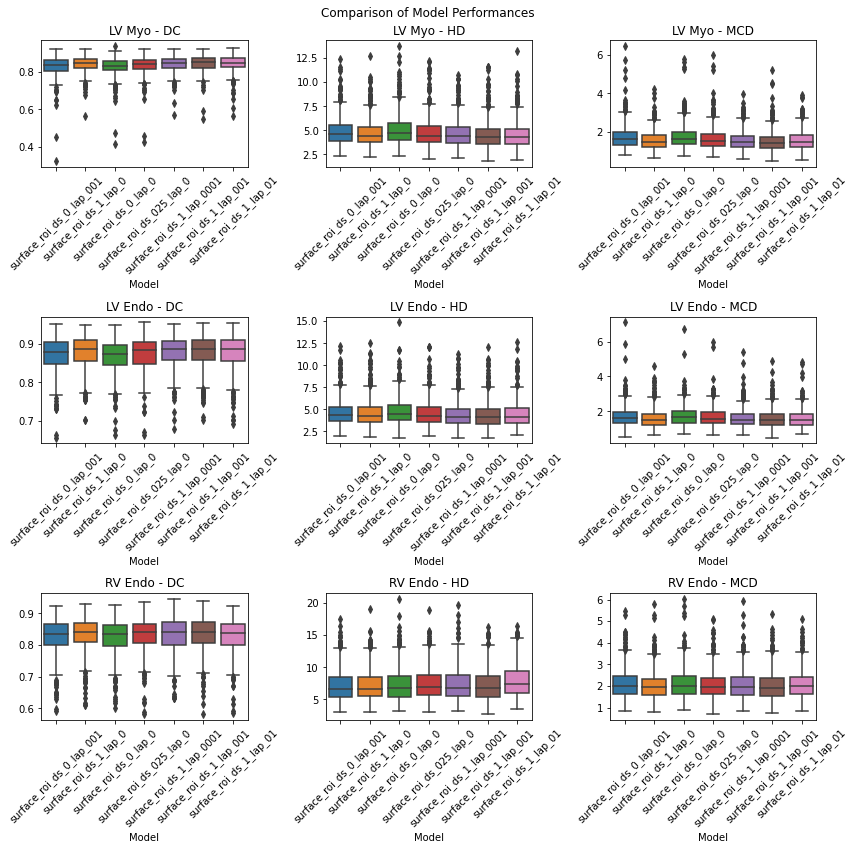

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and process the evaluation results from a CSV file
def process_results(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df['Model'] = model_name
    return df

# Directory containing the evaluation results
results_dir = "../Predictions/Surface/"

# DataFrame to store the evaluation results for each subpart
all_results = pd.DataFrame()

# Iterate over the models in the directory
for model_name in os.listdir(results_dir):
    model_path = os.path.join(results_dir, model_name)
    eval_file = os.path.join(model_path, "metrics.csv")

    if not os.path.exists(eval_file):
        continue
    
    # Process the evaluation results for the current model
    results = process_results(eval_file, model_name)
    all_results = all_results.append(results, ignore_index=True)

metrics = ['LV Myo - DC', 'LV Myo - HD', 'LV Myo - MCD', 
           'LV Endo - DC', 'LV Endo - HD', 'LV Endo - MCD', 
           'RV Endo - DC', 'RV Endo - HD', 'RV Endo - MCD']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, metric in enumerate(metrics):
    sns.boxplot(x="Model", y=metric, data=all_results, ax=axes[i // 3, i%3])
    axes[i // 3, i%3].set_title(metric)
    axes[i // 3, i%3].set_ylabel('')
    axes[i // 3, i%3].tick_params(axis='x', rotation=45)

plt.suptitle("Comparison of Model Performances")
plt.tight_layout()
plt.show()


In [7]:
def get_nice_dataframe(df, metrics, vertical = False):
    models = df["Model"].unique()

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(2)
    df_std = df_std.round(2)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]) 
            std_str = str(df_std.loc[model, metric]) 
            if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
                mean_str += '0'
            if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
                std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df


metrics = ['LV Endo - DC', 'LV Endo - HD', 'LV Endo - MCD', 
           'LV Myo - DC', 'LV Myo - HD', 'LV Myo - MCD', 
           'RV Endo - DC', 'RV Endo - HD', 'RV Endo - MCD']


#metrics = ["LA 2CH - DC", "LA 2CH - HD", "LA 2CH - MCD",
#            "LA 4CH - DC", "LA 4CH - HD", "LA 4CH - MCD",
#            "RA 4CH - DC", "RA 4CH - HD", "RA 4CH - MCD"]

nice = get_nice_dataframe(all_results, metrics, vertical=1)

nice["MCSI-Net-Paper"] = ["0.88 (0.05)", "7.06 (2.64)", "1.86 (0.79)",
                    "0.78 (0.08)", "4.75 (1.76)", "1.86 (0.82)", 
                    "0.85 (0.06)", "7.06 (2.64)", "2.27 (0.95)"]

display(nice)

,surface_roi_ds_0_lap_001,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_0001,surface_roi_ds_1_lap_001,surface_roi_ds_1_lap_01,MCSI-Net-Paper
LV Endo - DC,0.87 (0.04),0.88 (0.04),0.87 (0.04),0.88 (0.04),0.88 (0.04),0.88 (0.04),0.88 (0.04),0.88 (0.05)
LV Endo - HD,4.63 (1.47),4.55 (1.45),4.76 (1.45),4.60 (1.45),4.44 (1.41),4.42 (1.43),4.40 (1.42),7.06 (2.64)
LV Endo - MCD,1.70 (0.61),1.59 (0.52),1.73 (0.57),1.65 (0.54),1.57 (0.51),1.56 (0.51),1.57 (0.51),1.86 (0.79)
LV Myo - DC,0.83 (0.05),0.84 (0.04),0.83 (0.05),0.83 (0.04),0.84 (0.04),0.85 (0.04),0.84 (0.04),0.78 (0.08)
LV Myo - HD,4.87 (1.45),4.65 (1.34),5.03 (1.52),4.75 (1.47),4.64 (1.37),4.52 (1.39),4.54 (1.38),4.75 (1.76)
LV Myo - MCD,1.74 (0.63),1.57 (0.49),1.75 (0.61),1.66 (0.58),1.55 (0.49),1.54 (0.52),1.56 (0.50),1.86 (0.82)
RV Endo - DC,0.83 (0.05),0.83 (0.05),0.83 (0.05),0.83 (0.05),0.83 (0.05),0.84 (0.05),0.83 (0.05),0.85 (0.06)
RV Endo - HD,7.23 (2.43),7.26 (2.45),7.27 (2.48),7.53 (2.54),7.36 (2.55),7.23 (2.47),7.92 (2.52),7.06 (2.64)
RV Endo - MCD,2.10 (0.68),2.02 (0.64),2.12 (0.69),2.06 (0.66),2.03 (0.66),1.99 (0.64),2.07 (0.63),2.27 (0.95)
